In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [77]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [ ]:
df = pd.read_csv("/content/Bengaluru_House_Data.csv")

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
for column in df.columns:
  print(df[column].value_counts())
  print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [ ]:
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [ ]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [ ]:
df['location']=df['location'].fillna('Sarjapur Road')

In [ ]:
df['size'].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [ ]:
df['size']=df['size'].fillna('2 BHK')

In [ ]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [ ]:
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)



In [ ]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def convertRange(x):
  temp = x.split('-')
  if len(temp)==2:
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None


In [ ]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [ ]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
cat_features = df.select_dtypes(include=['object']).columns

In [ ]:
num_features = df.select_dtypes(exclude=['object']).columns

Price per square feet

In [ ]:
df['Price_per_sqft']=df['price']*100000/df['total_sqft']

In [ ]:
df.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


<Axes: xlabel='bhk', ylabel='Density'>

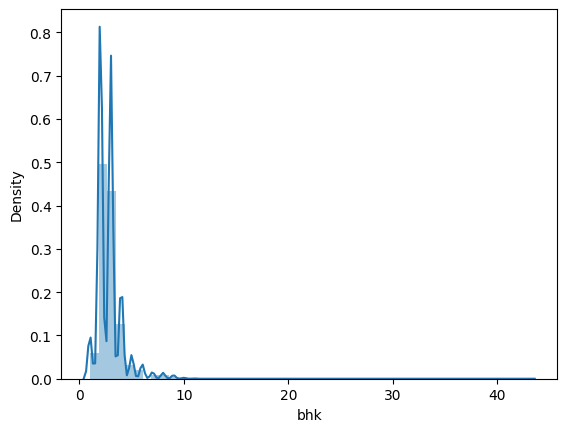

In [ ]:
sns.distplot(df['bhk'])

In [ ]:
df.describe()

,total_sqft,bath,price,bhk,Price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
df['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1
singapura paradise,1


In [ ]:
df['location']=df['location'].apply(lambda x:x.strip())
location_count=df['location'].value_counts()

In [ ]:
df['location'].value_counts()

,count
location,
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
1Channasandra,1
Hosahalli,1
Vijayabank bank layout,1


In [ ]:
location_count_less_10 = location_count[location_count<=10]

In [ ]:
location_count_less_10

,count
location,
BTM 1st Stage,10
Nagadevanahalli,10
Basapura,10
Sector 1 HSR Layout,10
Dairy Circle,10
...,...
1Channasandra,1
Hosahalli,1
Vijayabank bank layout,1


In [ ]:
df['location']=df['location'].apply(lambda x:'other' if x in location_count_less_10 else x)

In [ ]:
df['location'].value_counts()

,count
location,
other,2886
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Nehru Nagar,11
Banjara Layout,11
LB Shastri Nagar,11


In [ ]:
df.describe()

,total_sqft,bath,price,bhk,Price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
(df['total_sqft']/df['bhk']).describe()

,0
count,13274.000000
mean,575.074878
std,388.205175
min,0.250000
25%,473.333333
50%,552.500000
75%,625.000000
max,26136.000000


In [ ]:
df = df[((df['total_sqft']/df['bhk'])>=300)]
df.describe()

,total_sqft,bath,price,bhk,Price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [ ]:
df.shape

(12530, 7)

In [ ]:
df.Price_per_sqft.describe()

,Price_per_sqft
count,12530.000000
mean,6303.979357
std,4162.237981
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [ ]:
def remove_outliers_sqft(df):
  df_output = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    gen_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_output = pd.concat([df_output,gen_df],ignore_index=True)
  return df_output
df = remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,Price_per_sqft
count,7011.000000,7011.000000,7011.000000,7011.000000,7011.000000
mean,1467.307519,2.420625,83.375893,2.533875,5415.916539
std,876.986816,0.912160,71.338631,0.854351,1797.535814
min,300.000000,1.000000,10.000000,1.000000,2439.024390
25%,1101.000000,2.000000,50.000000,2.000000,4334.771897
50%,1270.000000,2.000000,65.310000,2.000000,5109.489051
75%,1600.000000,3.000000,91.465000,3.000000,6077.889719
max,30400.000000,16.000000,2100.000000,16.000000,24166.666667


In [ ]:
def bhk_outlier_remover(df):
  exclude_indices = np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.Price_per_sqft),
          'std':np.std(bhk_df.Price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
        return df.drop(exclude_indices,axis='index')

In [ ]:
df = bhk_outlier_remover(df)

In [ ]:
df.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
1,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
2,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
3,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
4,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667


In [ ]:
df.drop(columns=['size','Price_per_sqft'],inplace=True)

Cleaned data

In [ ]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1630.0,3.0,194.0,3
1,1st Block Jayanagar,1875.0,2.0,235.0,3
2,1st Block Jayanagar,1235.0,2.0,148.0,2
3,1st Phase JP Nagar,2825.0,4.0,250.0,4
4,1st Phase JP Nagar,1875.0,3.0,167.0,3


In [ ]:
df.to_csv('Cleaned_data.csv')

In [66]:
X = df.drop(columns=['price'])
y = df['price']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Apply linear regression

In [80]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False),['location']), remainder='passthrough')

In [81]:
scaler = StandardScaler()

In [85]:
lr = LinearRegression()

In [86]:
pipe = make_pipeline(column_trans, scaler, lr)

In [88]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [89]:
y_pred_lr = pipe.predict(X_test)

In [90]:
r2_score(y_test, y_pred_lr)

0.9180526477153338

Apply Lasso

In [91]:
lasso = Lasso()

In [93]:
pipe = make_pipeline(column_trans, scaler, lasso)

In [95]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [96]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.8874518684713739

Apply Ridge

In [97]:
ridge = Ridge()

In [98]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [99]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [101]:
y_pred_ridge = pipe.predict(X_test)

In [102]:
r2_score(y_test, y_pred_ridge)


0.9180493345520043

In [104]:

print("No Regularization : ", r2_score(y_test, y_pred_lr))


No Regularization :  0.9180526477153338


In [105]:
print("Lasso : ", r2_score(y_test, y_pred_lasso))
print("Ridge : ", r2_score(y_test, y_pred_ridge))

Lasso :  0.8874518684713739
Ridge :  0.9180493345520043


In [106]:
import pickle

In [110]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))

In [111]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1630.0,3.0,194.0,3
1,1st Block Jayanagar,1875.0,2.0,235.0,3
2,1st Block Jayanagar,1235.0,2.0,148.0,2
3,1st Phase JP Nagar,2825.0,4.0,250.0,4
4,1st Phase JP Nagar,1875.0,3.0,167.0,3


In [116]:
import pickle
import pandas as pd

# Load the saved model pipeline
pipe = pickle.load(open('RidgeModel.pkl', 'rb'))

# Define the input data (must match training features)
new_data = pd.DataFrame({
    'location': ['Whitefield'],
    'total_sqft': [1200],
    'bath': [2],
    'bhk': [3]
})

# Make a prediction
prediction = pipe.predict(new_data)[0]  # Access the first prediction

# Format the output
price = round(prediction * 1e5, 2)  # Assuming the price was scaled during training
print(f"Predicted Price: ₹{price}")

Predicted Price: ₹6491086.24
